In [1]:
import os
os.chdir('../') # important if this notebook is not in main but in notebooks folder

import matplotlib.pyplot as plt
import gerda.pre.initialize_households as ih
import numpy as np

In [2]:
ages = []
for i in range(10000):
    hhd_type, hhd_mmbrs, hhd_ages = ih.initialize_household()
    if i<30:
        print(hhd_type, hhd_mmbrs, hhd_ages)
    #if hhd_type=='Paare mit Kind(ern)':
        #continue
    ages.extend(hhd_ages)

Paare mit Kind(ern) 4 [0, 6, 39, 28]
Einpersonenhaushalte (Singlehaushalte) 1 [78]
Alleinerziehende Elternteile 2 [3, 32, 33]
Paare ohne Kind(er) 2 [55, 44]
Einpersonenhaushalte (Singlehaushalte) 1 [33]
Einpersonenhaushalte (Singlehaushalte) 1 [56]
Paare mit Kind(ern) 3 [27, 45, 49]
Alleinerziehende Elternteile 2 [16, 55, 41]
Mehrpersonenhaushalte ohne Kernfamilie 3 [55, 29, 43]
Einpersonenhaushalte (Singlehaushalte) 1 [73]
Mehrpersonenhaushalte ohne Kernfamilie 3 [56, 49, 60]
Paare ohne Kind(er) 2 [58, 63]
Einpersonenhaushalte (Singlehaushalte) 1 [41]
Paare ohne Kind(er) 2 [18, 19]
Einpersonenhaushalte (Singlehaushalte) 1 [32]
Einpersonenhaushalte (Singlehaushalte) 1 [60]
Einpersonenhaushalte (Singlehaushalte) 1 [68]
Einpersonenhaushalte (Singlehaushalte) 1 [48]
Paare ohne Kind(er) 2 [43, 41]
Paare ohne Kind(er) 2 [86, 90]
Einpersonenhaushalte (Singlehaushalte) 1 [69]
Einpersonenhaushalte (Singlehaushalte) 1 [21]
Paare ohne Kind(er) 2 [67, 65]
Einpersonenhaushalte (Singlehaushalte) 1 

(array([180., 164., 162., 174., 180., 174., 214., 219., 216., 193., 202.,
        215., 223., 223., 224., 191., 204., 205., 191., 255., 281., 259.,
        279., 297., 293., 263., 263., 337., 316., 355., 233., 244., 271.,
        259., 313., 333., 297., 335., 307., 332., 356., 379., 379., 406.,
        400., 374., 373., 336., 393., 385., 360., 355., 363., 365., 369.,
        354., 340., 294., 306., 276., 246., 214., 236., 207., 198., 238.,
        239., 229., 211., 183., 198., 171., 175., 160., 136.,  91., 120.,
        143., 129., 145., 153., 123., 107., 111.,  78.,  77.,  69.,  55.,
         48.,  42.,  36.,  25.,  24.,  17.,  23.,  15.,   8.,   7.,  10.,
          3.]),
 array([ 0.  ,  0.99,  1.98,  2.97,  3.96,  4.95,  5.94,  6.93,  7.92,
         8.91,  9.9 , 10.89, 11.88, 12.87, 13.86, 14.85, 15.84, 16.83,
        17.82, 18.81, 19.8 , 20.79, 21.78, 22.77, 23.76, 24.75, 25.74,
        26.73, 27.72, 28.71, 29.7 , 30.69, 31.68, 32.67, 33.66, 34.65,
        35.64, 36.63, 37.62, 38.61

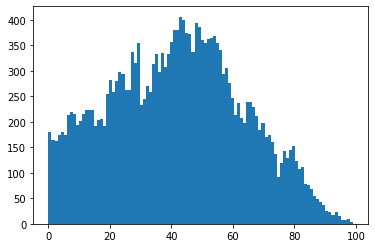

In [3]:
fig = plt.figure()
plt.hist(ages,bins=100)#[0,11,21,31,41,51,61,71,81,91,101,111,121])

In [4]:
types_list, types_probabilities, size_dist_per_type, age_dist_per_type = ih.get_tables()
#size_dist_per_type

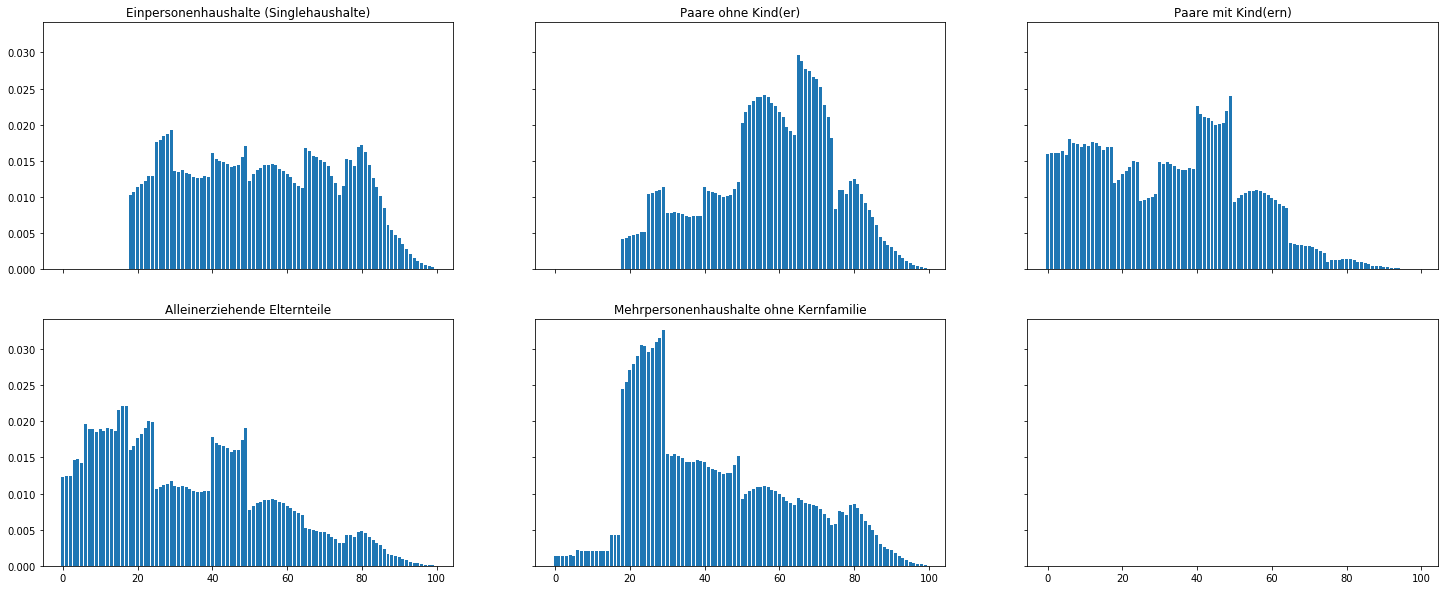

In [5]:
fig, axs = plt.subplots(2,3, sharey=True, sharex=True, figsize = (25,10))
axs = axs.flat
for i,key in enumerate(age_dist_per_type):
    axs[i].bar(age_dist_per_type[key][0],age_dist_per_type[key][1])
    axs[i].set_title(key)

In [6]:
ages_together = np.array(range(100))
probs_together = np.zeros_like(ages_together,dtype=float)
for key,weight in zip(types_list, types_probabilities):
    for i,a in enumerate(ages_together):
        if a in age_dist_per_type[key][0]:
            index = np.where(age_dist_per_type[key][0] == a)[0][0]
            #print('  before: ',weight*age_dist_per_type[key][1][index],probs_together[i])#,age_dist_per_type[key][0][index])
            probs_together[i]+=(weight*age_dist_per_type[key][1][index])
            #print('  after: ',weight*age_dist_per_type[key][1][index],probs_together[i])
#probs_together

<BarContainer object of 100 artists>

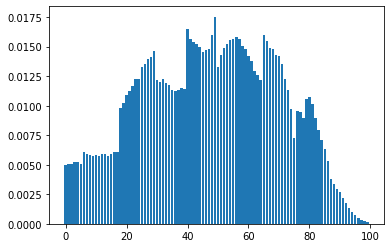

In [7]:
fig = plt.figure()
plt.bar(ages_together,probs_together)

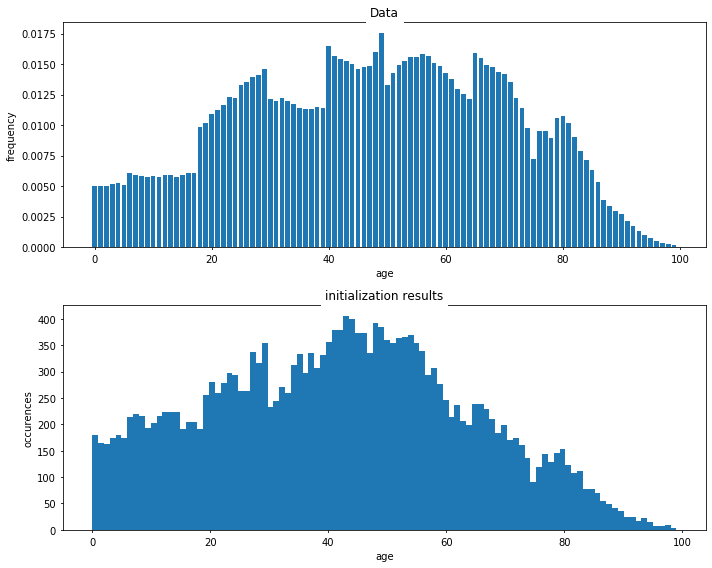

In [10]:
fig, axs = plt.subplots(2, figsize=(10,8))
axs[0].bar(ages_together,probs_together)
axs[0].set_title('Data', backgroundcolor='white')
axs[1].hist(ages,bins=100)
axs[0].set_ylabel('frequency', backgroundcolor='white')
axs[1].set_ylabel('occurences', backgroundcolor='white')
axs[1].set_title('initialization results', backgroundcolor='white')
for ax in axs:
    ax.set_xlabel('age', backgroundcolor='white')
    plt.setp(ax.get_xticklabels(), backgroundcolor='white')
    plt.setp(ax.get_yticklabels(), backgroundcolor='white')
plt.tight_layout()